<a href="https://colab.research.google.com/github/Gagancoder/-F-R-D-DDY-/blob/main/CLASS_122_Alphabet_Recogniser_HOMEWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading the Data by `csv` and `npz`

In [4]:
X = np.load('image.npz')['arr_0']
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
nclasses = len(classes)

C    550
I    550
J    550
M    550
D    550
N    550
E    550
R    550
Y    550
Z    550
S    550
L    550
G    550
U    550
X    550
H    550
F    550
V    550
W    550
T    550
B    550
A    550
P    550
K    550
Q    550
O    550
Name: labels, dtype: int64


# Taking the samples for each `ALPHABET`

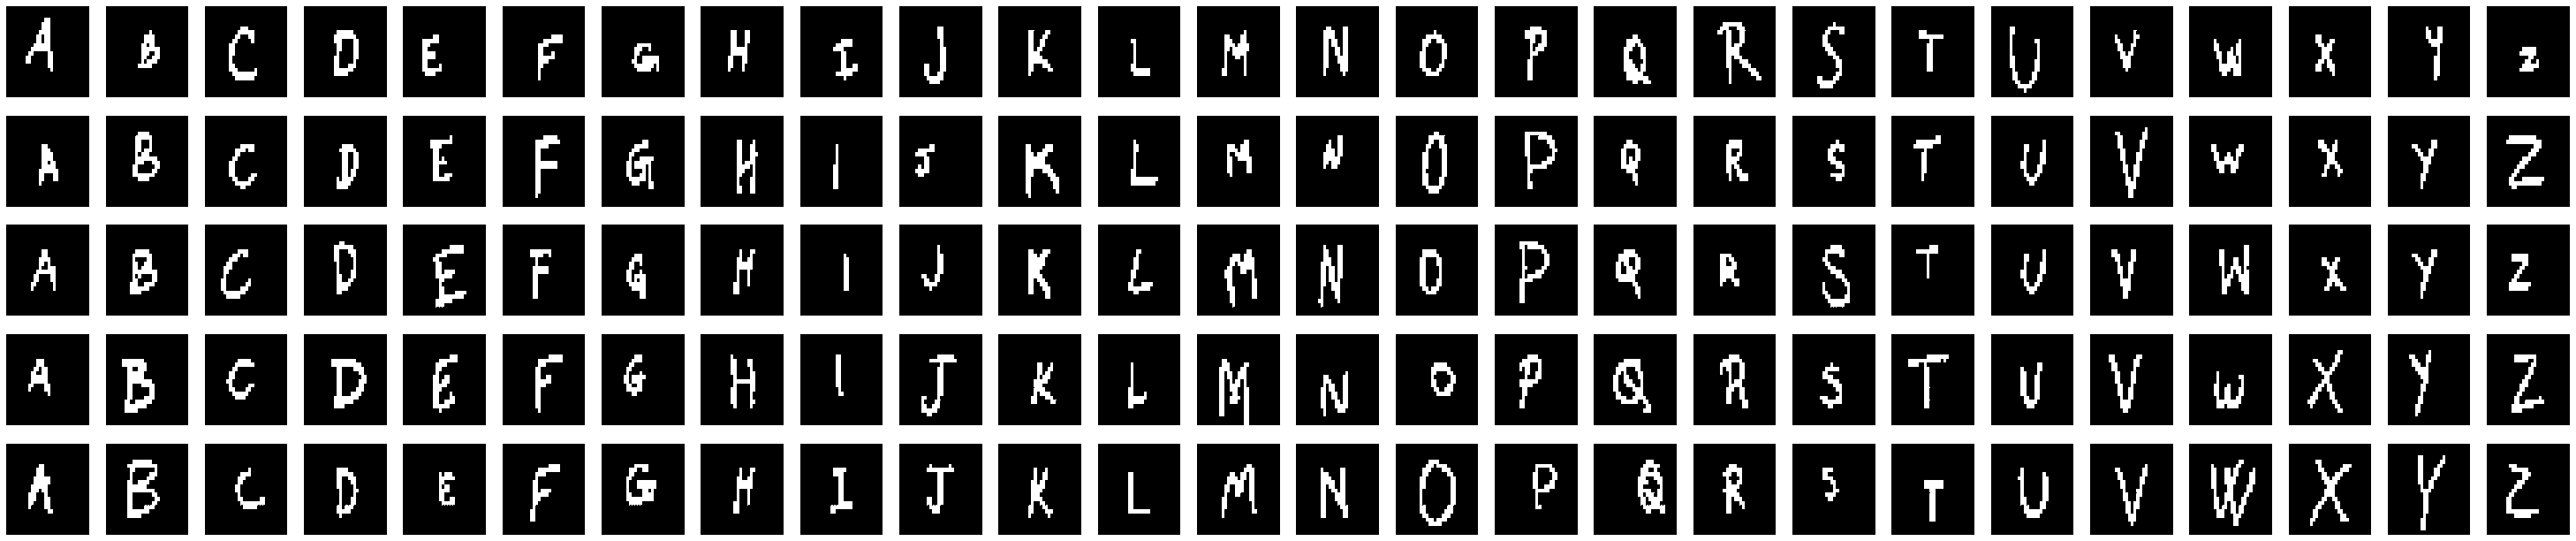

In [5]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (22,30)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

# PRINTING X TO CHECK THE VALUES

In [6]:
print(len(X))
print(len(X[0]))

14300
660


# PRINTING `X` AND `Y` WITH `ARRAY 0 `

In [7]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

# `TRAINING` AND `TESTING` THE DATA

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=7500, test_size=2500)

#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

# CLASSIFYING WITH `LOGISTIC REGRESSION `

In [9]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


# `PREDICTING Y` ANG GETTING THE `ACCURACY`

In [10]:
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy is :- ", accuracy)

The accuracy is :-  0.9952


# Taking the `Figure `of the DATA

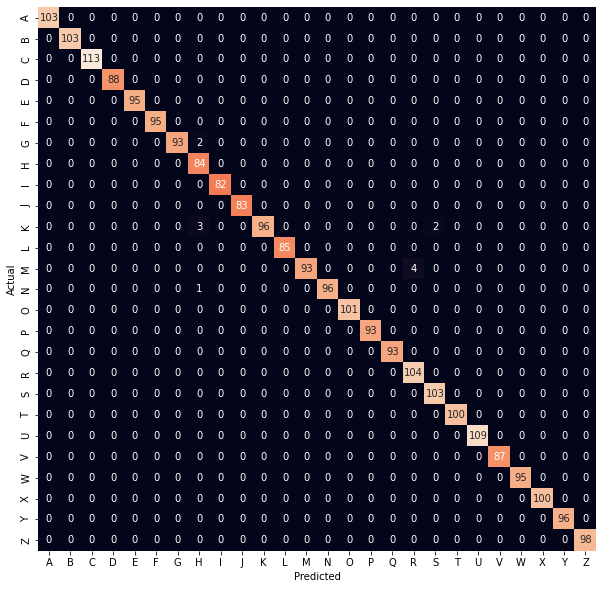

In [11]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)